In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [5]:
data_path1 = "../../data/02_processed/02_prod/prod_1/"
data_path2 = "../../data/02_processed/02_prod/prod_2/"
data_path3 = "../../data/02_processed/02_prod/prod_3/"
data_path4 = "../../data/02_processed/02_prod/prod_4/"

In [8]:
tem_df1 = pd.read_csv(data_path1 + "prod_1.xvg", header = None, sep = " ", skipinitialspace=True)
tem_df2 = pd.read_csv(data_path2 + "prod_2.xvg", header = None, sep = " ", skipinitialspace=True)
tem_df3 = pd.read_csv(data_path3 + "prod_3.xvg", header = None, sep = " ", skipinitialspace=True)
tem_df4 = pd.read_csv(data_path4 + "prod_4.xvg", header = None, sep = " ", skipinitialspace=True)

tem_df = pd.concat([tem_df1, tem_df2, tem_df3, tem_df4])
tem_df[0] = 2 * np.arange(len(tem_df))

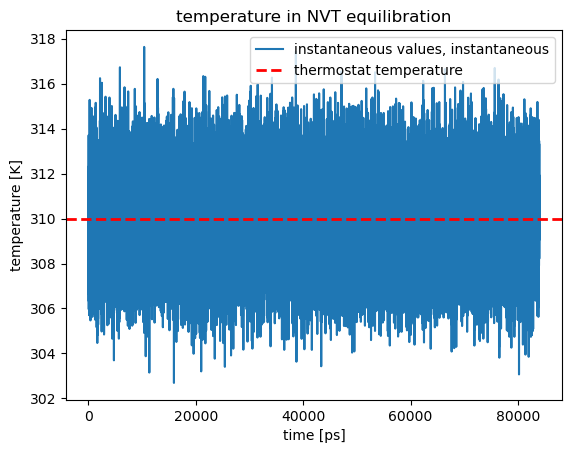

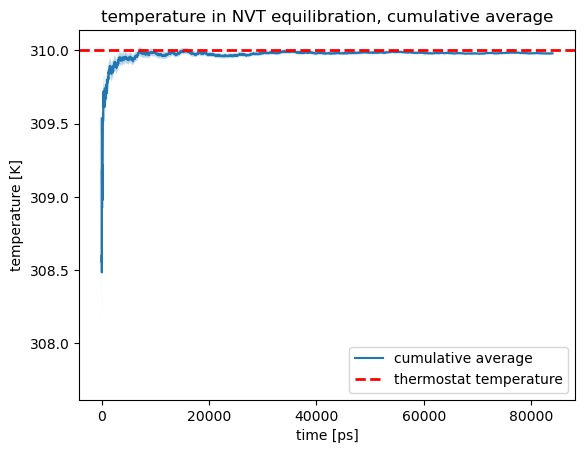

In [9]:
plt.plot(tem_df[0], tem_df[1], label = "instantaneous values, instantaneous")
# plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
plt.title("temperature in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

# plt.plot(tem_df[0], tem_df[1], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
errors = np.sqrt(tem_df[1].expanding().var() / tem_df[1].expanding().count())
plt.fill_between(tem_df[0], tem_df[1].expanding().mean() + errors, tem_df[1].expanding().mean() - errors, alpha=0.3)
plt.title("temperature in NVT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

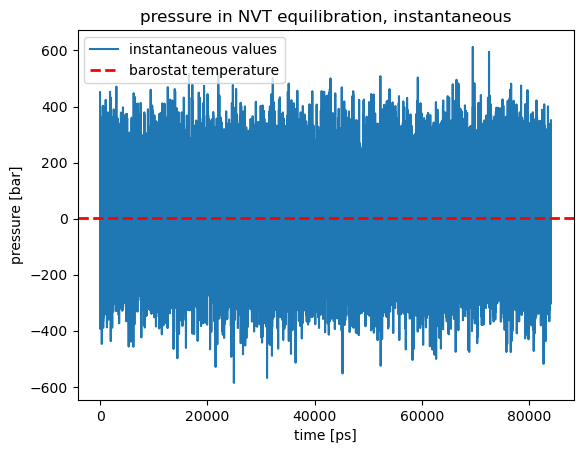

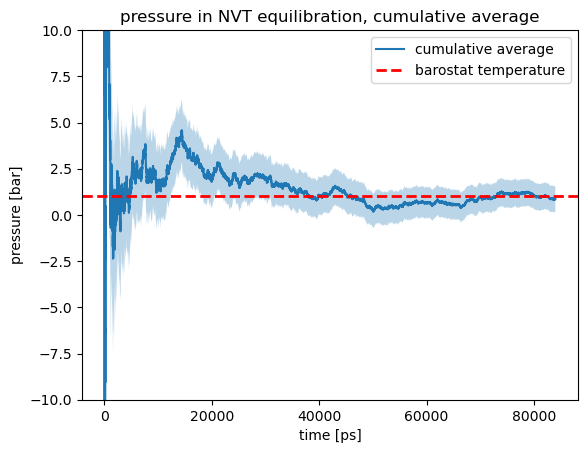

In [10]:
plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
# plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
plt.title("pressure in NVT equilibration, instantaneous")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.show()

# plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
errors = np.sqrt(tem_df[2].expanding().var() / tem_df[2].expanding().count())
plt.fill_between(tem_df[0], tem_df[2].expanding().mean() + errors, tem_df[2].expanding().mean() - errors, alpha=0.3)
plt.title("pressure in NVT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.ylim(-10,10)
plt.show()

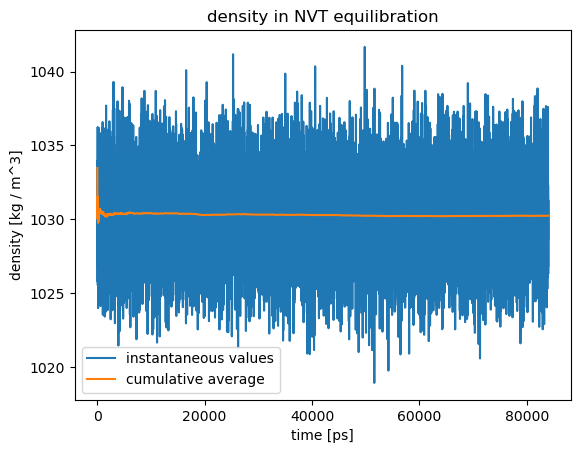

In [11]:
plt.plot(tem_df[0], tem_df[4], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[4].expanding().mean(), label = "cumulative average")
plt.title("density in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("density [kg / m^3]")
# plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()